In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_thcv_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..THCV
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.030928
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.030928
2,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.030928
3,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.030928
4,11,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.030928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.154639
74996,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.154639
74997,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.154639
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.154639


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..THCV', 'index'], axis = 1)
y = df_knn[['X..THCV']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.03092784],
       [0.03092784],
       [0.03092784],
       ...,
       [0.15463918],
       [0.15463918],
       [0.15463918]])

<AxesSubplot:ylabel='Count'>

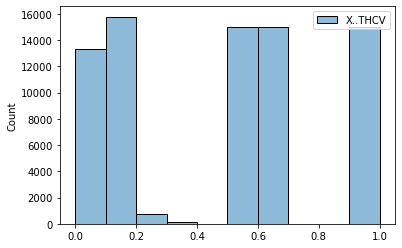

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.0158949756936458

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.0033114131548392144

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.05754487948409671

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9768895977585718

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.9729371796836789

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.05073586e-01, 5.96820213e-02, 1.04745017e-01, 6.59910752e-02,
       7.41742429e-02, 2.64602230e-01, 1.74295674e-03, 7.48314094e-04,
       1.85614980e-04, 6.47704585e-04, 1.31504866e-03, 0.00000000e+00,
       3.94981201e-03, 3.38456100e-04, 3.32726656e-04, 4.54592826e-03,
       4.53482283e-03, 1.59183496e-03, 0.00000000e+00, 4.90332691e-03,
       0.00000000e+00, 0.00000000e+00, 2.48657370e-03, 4.50877844e-03,
       6.20034661e-03, 3.25661208e-04, 6.50696455e-03, 1.51767052e-04,
       0.00000000e+00, 5.96618908e-04, 3.19989767e-03, 0.00000000e+00,
       6.29640751e-03, 0.00000000e+00, 0.00000000e+00, 2.80989980e-03,
       4.35921288e-03, 3.83427468e-03, 1.45695718e-05, 4.61562302e-05,
       1.65728784e-05, 3.04317810e-03, 4.11131222e-06, 1.06168664e-03,
       3.80932944e-05, 2.52955875e-02, 1.57809080e-04, 1.70859026e-05,
       7.05553833e-02, 3.67777762e-05, 1.07443413e-02, 6.90202685e-03,
       1.39499420e-03, 2.48226937e-04, 4.46735154e-03, 8.31488658e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,cheese,citrus,lime
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,1,0,0
2,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0
3,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0
4,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0
...,...,...,...,...,...,...,...,...,...
74995,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74996,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74997,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'cheese',
 'citrus',
 'lime']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_thcv.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_thcv.pkl")

['selector_knn_lsa_elbow_thcv.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.020070479645402324

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.005163107167515511

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.07185476440372977

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9729317995527854

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.9580013054495515

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [38]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [39]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.013917101162928077

In [40]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.0643189626983501

In [41]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9882399939568776

In [42]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9663486326664025

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [43]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [44]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_thcv.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_thcv.pkl")

['y_test_knreg_lsa_elbow_thcv.pkl']

In [45]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.01453418170964589

In [46]:
mean_squared_error(y_test, y_pred_knreg_test)

0.004387333431314879

In [47]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.06623694913954657

In [48]:
r2_score(y_test, y_pred_knreg_test)

0.9638145667415775

In [49]:
y_test

,X..THCV
11591,0.226804
52020,1.000000
34666,0.680412
22169,0.103093
23049,0.154639
...,...
60863,1.000000
32316,0.680412
60933,0.010309
43206,0.158076


In [50]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

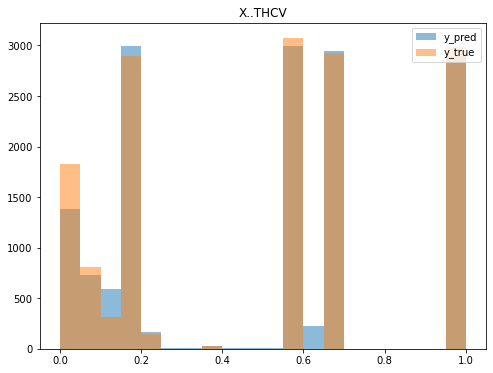

<Figure size 432x288 with 0 Axes>

In [51]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..THCV"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_thcv.png')

Pearson R

In [52]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.982
P-value: 0.000


<AxesSubplot:>

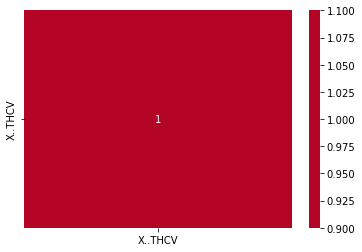

In [53]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)